In [1]:
import os
import sys
sys.path.append(os.pardir) 
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

In [3]:
weight_decay_lambda = 0 
# weight_decay_lambda = 0.1

In [4]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) 

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

In [5]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


epoch:0, train acc:0.12333333333333334, test acc:0.1047
epoch:1, train acc:0.13666666666666666, test acc:0.1093
epoch:2, train acc:0.15666666666666668, test acc:0.1249
epoch:3, train acc:0.17666666666666667, test acc:0.1347
epoch:4, train acc:0.20666666666666667, test acc:0.1515
epoch:5, train acc:0.24333333333333335, test acc:0.1689
epoch:6, train acc:0.25666666666666665, test acc:0.1854
epoch:7, train acc:0.27666666666666667, test acc:0.1991
epoch:8, train acc:0.31666666666666665, test acc:0.21
epoch:9, train acc:0.32, test acc:0.2162
epoch:10, train acc:0.35, test acc:0.2254
epoch:11, train acc:0.37, test acc:0.2427
epoch:12, train acc:0.41333333333333333, test acc:0.2653
epoch:13, train acc:0.43333333333333335, test acc:0.2786
epoch:14, train acc:0.4766666666666667, test acc:0.306
epoch:15, train acc:0.49666666666666665, test acc:0.3176
epoch:16, train acc:0.5466666666666666, test acc:0.3439
epoch:17, train acc:0.5466666666666666, test acc:0.3627
epoch:18, train acc:0.5566666666666

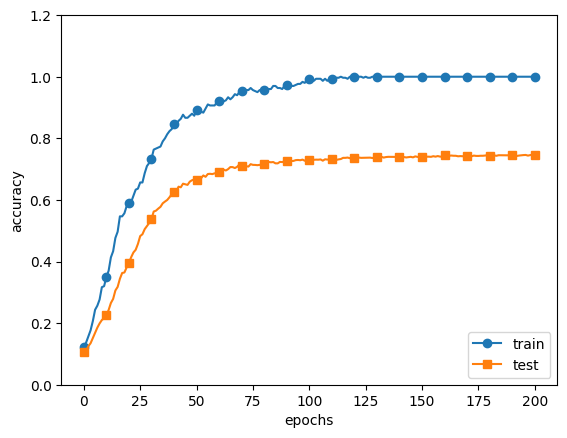

In [7]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.2)
plt.legend(loc='lower right')
plt.show()